<a href="https://colab.research.google.com/github/adimyth/fast-ai/blob/master/Lesson_2(tuts).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating our own classifier

Here, I'm going to download images from Google for some cricketers & train a classifier to classify them.

I have the following cricketers list


*   Virat Kohli
*   MSD
*   Rohit Sharma
*   Sachin Tendulkar
*   Rahul Dravid



## Cloning my repo

In [0]:
!git clone https://github.com/adimyth/fast-ai.git

Cloning into 'fast-ai'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 19 (delta 2), reused 12 (delta 2), pack-reused 0
Unpacking objects: 100% (19/19), done.


## Downloading Images

In [0]:
!mkdir data

In [0]:
%cd data
!mkdir virat dhoni rohit sachin rahul

/content/data


In [0]:
%cd /content/fast-ai/Lesson2/

/content/fast-ai/Lesson2


In [0]:
!git pull origin master

From https://github.com/adimyth/fast-ai
 * branch            master     -> FETCH_HEAD
Already up to date.


In [0]:
from fastai import *
from fastai.vision import *

In [0]:
path = Path('/content/data')
classes = ['sachin', 'virat', 'dhoni', 'rahul', 'rohit']

In [0]:
for cricketer in classes:
  download_images(cricketer+'.txt', path/cricketer, max_pics=300)

Error https://img.washingtonpost.com/wp-apps/imrs.php?src=https://img.washingtonpost.com/rf/image_908w/2010-2019/WashingtonPost/2013/11/14/Foreign/Images/Hkg9188297.jpg&w=1484 HTTPSConnectionPool(host='img.washingtonpost.com', port=443): Read timed out. (read timeout=4)
Error http://digitalshare.in/wp-content/uploads/2018/01/Sachin-Tendulkar-Education.jpg HTTPConnectionPool(host='digitalshare.in', port=80): Max retries exceeded with url: /wp-content/uploads/2018/01/Sachin-Tendulkar-Education.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f31d07ef518>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution',))
Error http://digitalshare.in/wp-content/uploads/2018/01/Sachin-Tendulkar-Education.jpg HTTPConnectionPool(host='digitalshare.in', port=80): Max retries exceeded with url: /wp-content/uploads/2018/01/Sachin-Tendulkar-Education.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f31d07f

Error https://www.insidesport.co/wp-content/uploads/2018/09/Tendulkar-sponsor-696x464.jpg HTTPSConnectionPool(host='www.insidesport.co', port=443): Max retries exceeded with url: /wp-content/uploads/2018/09/Tendulkar-sponsor-696x464.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f31d07547b8>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution',))
Error https://www.insidesport.co/wp-content/uploads/2018/07/IPL-Moneyball.jpg HTTPSConnectionPool(host='www.insidesport.co', port=443): Max retries exceeded with url: /wp-content/uploads/2018/07/IPL-Moneyball.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f31d0754630>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution',))
Error https://www.hindustantimes.com/rf/image_size_960x540/HT/p2/2018/07/14/Pictures/_ef449432-876b-11e8-a662-45bbb3f001dc.jpg HTTPSConnectionPool(host='www.hindustan

Error http://webindia123.com/personal/sports/rahul.jpg ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))


In [0]:
for cricketer in classes:
  verify_images(path/cricketer, delete=True)

cannot identify image file <_io.BufferedReader name='/content/data/sachin/00000037.jpg'>
cannot identify image file <_io.BufferedReader name='/content/data/sachin/00000030.jpg'>
cannot identify image file <_io.BufferedReader name='/content/data/sachin/00000243.jpg'>
cannot identify image file <_io.BufferedReader name='/content/data/sachin/00000225.jpg'>
cannot identify image file <_io.BufferedReader name='/content/data/sachin/00000072.jpg'>


cannot identify image file <_io.BufferedReader name='/content/data/virat/00000052.jpg'>
cannot identify image file <_io.BufferedReader name='/content/data/virat/00000137.jpg'>
cannot identify image file <_io.BufferedReader name='/content/data/virat/00000010.jpg'>


cannot identify image file <_io.BufferedReader name='/content/data/dhoni/00000062.jpg'>
cannot identify image file <_io.BufferedReader name='/content/data/dhoni/00000224.jpg'>
cannot identify image file <_io.BufferedReader name='/content/data/dhoni/00000213.jpg'>


cannot identify image file <_io.BufferedReader name='/content/data/rahul/00000069.jpg'>
cannot identify image file <_io.BufferedReader name='/content/data/rahul/00000213.jpg'>
cannot identify image file <_io.BufferedReader name='/content/data/rahul/00000003.jpg'>


cannot identify image file <_io.BufferedReader name='/content/data/rohit/00000036.jpg'>
tuple index out of range
cannot identify image file <_io.BufferedReader name='/content/data/rohit/00000223.jpg'>
cannot identify image file <_io.BufferedReader name='/content/data/rohit/00000015.jpg'>
cannot identify image file <_io.BufferedReader name='/content/data/rohit/00000092.jpg'>
cannot identify image file <_io.BufferedReader name='/content/data/rohit/00000010.jpg'>


## Viewing Data

In [0]:
np.random.seed(42)

In [0]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.1, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data

ImageDataBunch;

Train: LabelList (1303 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
virat,virat,virat,virat,virat
Path: /content/data;

Valid: LabelList (144 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dhoni,rohit,sachin,rohit,virat
Path: /content/data;

Test: None

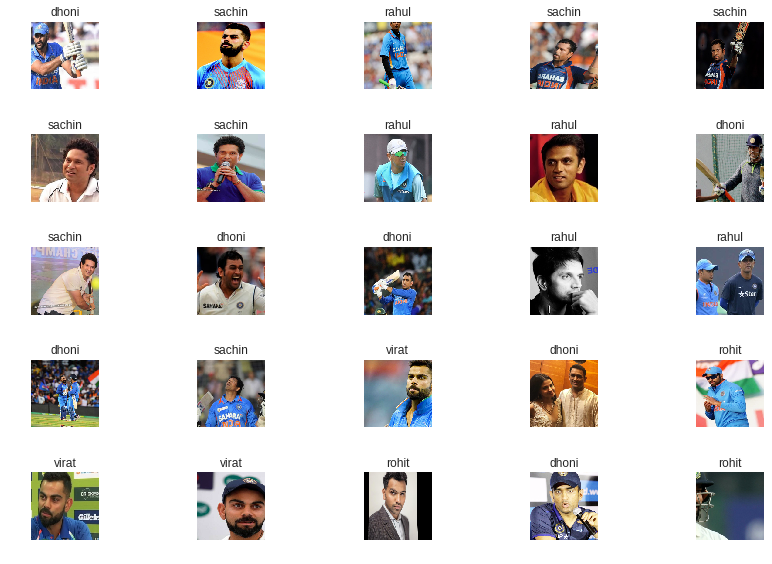

In [0]:
data.show_batch(row=5, figsize=(12, 8))

## Training

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 91041855.59it/s]


In [0]:
learn.fit_one_cycle(5, max_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.929003,1.425721,0.416667,00:56
1,1.555858,1.292852,0.576389,00:50
2,1.293210,1.203606,0.569444,00:51
3,1.095800,1.163462,0.604167,00:51
4,0.960422,1.139140,0.590278,00:49


In [0]:
learn.save('resnet50')

## Fine Tuning

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


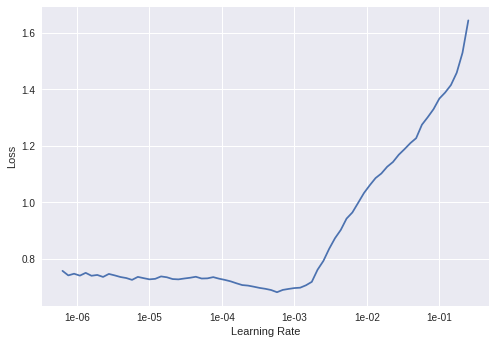

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, max_lr=1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.723089,1.034752,0.611111,00:52
1,0.658695,1.008107,0.666667,00:52
2,0.558126,0.912520,0.659722,00:52
3,0.467766,0.855883,0.701389,00:52
4,0.389922,0.842720,0.708333,00:52


In [0]:
learn.save('resnet50_fine_tuned')

## Interpretation

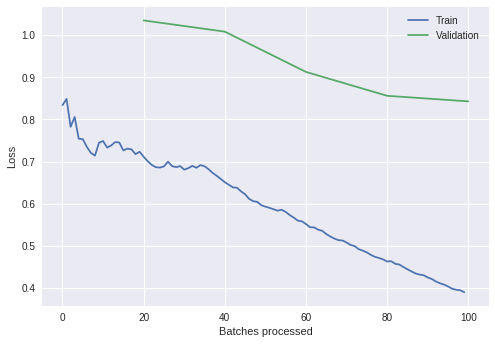

In [0]:
learn.recorder.plot_losses()

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

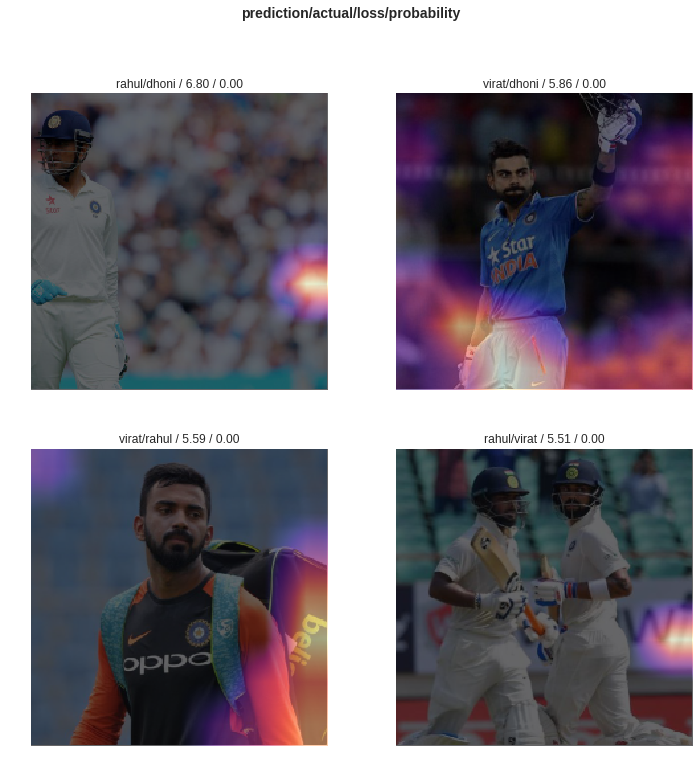

In [0]:
interp.plot_top_losses(4)

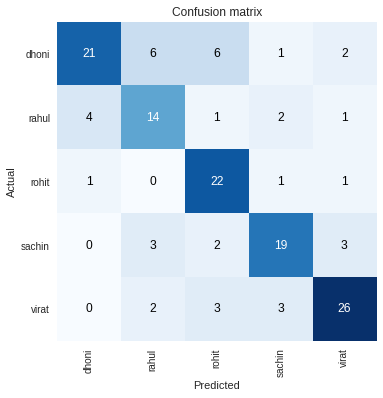

In [0]:
interp.plot_confusion_matrix()

In [0]:
interp.most_confused(min_val=5)

[('dhoni', 'rahul', 6), ('dhoni', 'rohit', 6)]

## More Images

In [0]:
!pip install git+https://github.com/cwerner/fastclass.git

### Creating search text csvs

In [0]:
%%writefile virat.csv

searchterm, exclude
virat kohli,  

Overwriting virat.csv


In [0]:
%%writefile rohit.csv

searchterm,exclude
rohit sharma,  

Overwriting rohit.csv


In [0]:
%%writefile sachin.csv

searchterm,exclude
sachin tendulkar,  

Overwriting sachin.csv


In [0]:
%%writefile rahul.csv

searchterm,exclude
rahul dravid,  

Overwriting rahul.csv


In [0]:
%%writefile dhoni.csv

searchterm,exclude
mahendra singh dhoni,  

Overwriting dhoni.csv


In [0]:
!mkdir virat_kohli

In [0]:
!fcd virat.csv -o virat_kohli

Directory "virat_kohli" exists. Would you like to overwrite the directory? [y/n]
y
INFO: final dataset will be located in virat_kohli
[1/2] Searching: >> searchterm <<
(1) Crawling ...
    -> GOOGLE
    -> BING
Number of duplicate image files: 19. Removing...
(2) Resizing images to (299, 299)
100% 1146/1146 [00:24<00:00, 47.32it/s]
[2/2] Searching: >> virat kohli <<
(1) Crawling ...
    -> GOOGLE
    -> BING
Number of duplicate image files: 25. Removing...
(2) Resizing images to (299, 299)
100% 1389/1392 [00:26<00:00, 51.88it/s]


In [0]:
!ls virat_kohli/virat_kohli/ | wc -l

In [0]:
!mkdir mahendra_singh_dhoni

In [0]:
!fcd dhoni.csv -o mahendra_singh_dhoni

Directory "mahendra_singh_dhoni" exists. Would you like to overwrite the directory? [y/n]
y
INFO: final dataset will be located in mahendra_singh_dhoni
[1/2] Searching: >> searchterm <<
(1) Crawling ...
    -> GOOGLE
    -> BING
Number of duplicate image files: 20. Removing...
(2) Resizing images to (299, 299)
100% 1155/1155 [00:24<00:00, 47.30it/s]
[2/2] Searching: >> mahendra singh dhoni <<
(1) Crawling ...
    -> GOOGLE
    -> BING
Number of duplicate image files: 38. Removing...
(2) Resizing images to (299, 299)
100% 1200/1200 [00:22<00:00, 54.12it/s]


In [0]:
!mkdir rohit_sharma

In [0]:
!fcd rohit.csv -o rohit_sharma/

Directory "rohit_sharma/" exists. Would you like to overwrite the directory? [y/n]
y
INFO: final dataset will be located in rohit_sharma/
[1/2] Searching: >> searchterm <<
(1) Crawling ...
    -> GOOGLE
    -> BING
Number of duplicate image files: 19. Removing...
(2) Resizing images to (299, 299)
100% 1133/1133 [00:23<00:00, 47.73it/s]
[2/2] Searching: >> rohit sharma <<
(1) Crawling ...
    -> GOOGLE
    -> BING
Number of duplicate image files: 42. Removing...
(2) Resizing images to (299, 299)
100% 1241/1241 [00:22<00:00, 55.31it/s]


In [0]:
!mkdir sachin_tendulkar

In [0]:
!fcd sachin.csv -o sachin_tendulkar/

In [0]:
!mkdir rahul_dravid

In [0]:
!fcd rahul.csv -o rahul_dravid

Directory "rahul_dravid" exists. Would you like to overwrite the directory? [y/n]
y
INFO: final dataset will be located in rahul_dravid
[1/2] Searching: >> searchterm <<
(1) Crawling ...
    -> GOOGLE
    -> BING
Number of duplicate image files: 19. Removing...
(2) Resizing images to (299, 299)
100% 1144/1144 [00:24<00:00, 47.22it/s]
[2/2] Searching: >> rahul dravid <<
(1) Crawling ...
    -> GOOGLE
    -> BING
Number of duplicate image files: 42. Removing...
(2) Resizing images to (299, 299)
100% 1101/1101 [00:19<00:00, 55.68it/s]


### Collating every classes together at one place

In [0]:
!mkdir dataset
!mv sachin_tendulkar/sachin_tendulkar dataset
!mv rohit_sharma/rohit_sharma dataset
!mv rahul_dravid/rahul_dravid dataset
!mv virat_kohli/virat_kohli dataset
!mv mahendra_singh_dhoni/mahendra_singh_dhoni dataset

## Training on newer data

In [0]:
path = Path('/content/dataset/')

In [0]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.1, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data

ImageDataBunch;

Train: LabelList (5506 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
rohit_sharma,rohit_sharma,rohit_sharma,rohit_sharma,rohit_sharma
Path: /content/dataset;

Valid: LabelList (611 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
rahul_dravid,sachin_tendulkar,rahul_dravid,rahul_dravid,sachin_tendulkar
Path: /content/dataset;

Test: None

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy])

In [5]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.647840,1.287437,0.520458,01:43
1,1.293081,1.107970,0.592471,01:31
2,1.084173,0.985097,0.646481,01:31
3,0.920782,0.923249,0.669394,01:31
4,0.833481,0.909679,0.677578,01:32


In [0]:
learn.unfreeze()

In [7]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


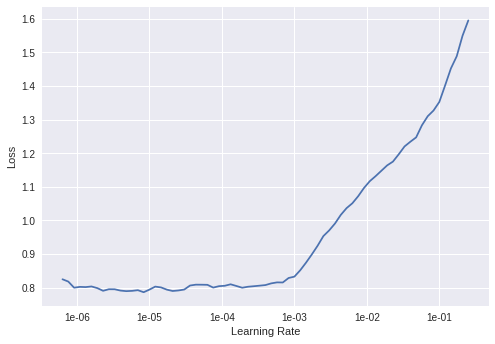

In [8]:
learn.recorder.plot()

In [9]:
learn.fit_one_cycle(5, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.798778,0.860821,0.685761,01:59
1,0.709131,0.802104,0.711948,01:59
2,0.583689,0.757102,0.743044,01:59
3,0.481735,0.737640,0.739771,02:00
4,0.414947,0.734239,0.744681,01:59


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

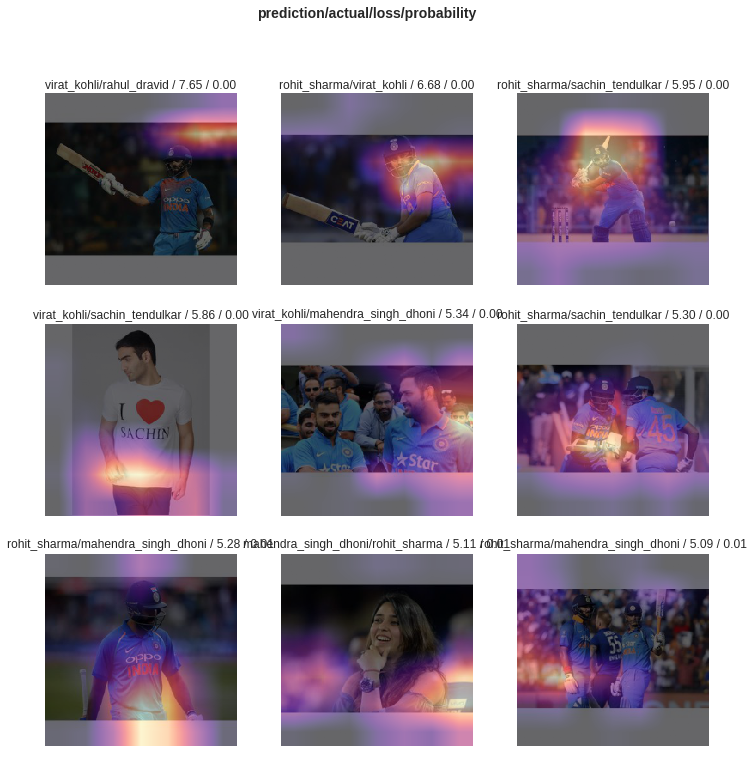

In [11]:
interp.plot_top_losses(9)

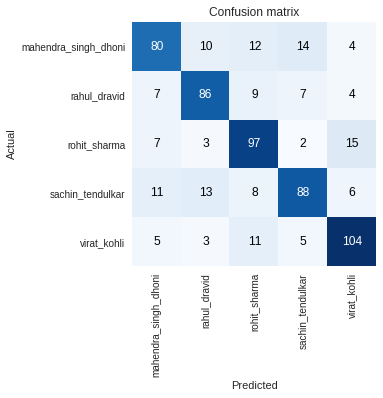

In [12]:
interp.plot_confusion_matrix()

In [13]:
interp.most_confused(min_val=5)

[('rohit_sharma', 'virat_kohli', 15),
 ('mahendra_singh_dhoni', 'sachin_tendulkar', 14),
 ('sachin_tendulkar', 'rahul_dravid', 13),
 ('mahendra_singh_dhoni', 'rohit_sharma', 12),
 ('sachin_tendulkar', 'mahendra_singh_dhoni', 11),
 ('virat_kohli', 'rohit_sharma', 11),
 ('mahendra_singh_dhoni', 'rahul_dravid', 10),
 ('rahul_dravid', 'rohit_sharma', 9),
 ('sachin_tendulkar', 'rohit_sharma', 8),
 ('rahul_dravid', 'mahendra_singh_dhoni', 7),
 ('rahul_dravid', 'sachin_tendulkar', 7),
 ('rohit_sharma', 'mahendra_singh_dhoni', 7),
 ('sachin_tendulkar', 'virat_kohli', 6),
 ('virat_kohli', 'mahendra_singh_dhoni', 5),
 ('virat_kohli', 'sachin_tendulkar', 5)]

### Removing Confusing Images

In [0]:
ds, idxs = DatasetFormatter().get_toplosses_idxs(learn, n_imgs=10)

In [74]:
idxs

tensor([3581, 3741, 4852, 2695, 1292, 5070, 4290,   61, 4504, 4335])

In [0]:
ImageCleaner(ds, idxs, path)

In [0]:
learn.recorder.plot_losses()

## Inference

In [15]:
!wget https://c.ndtvimg.com/2019-03/7j8idu0o_rohit-sharma-mumbai-indians-afp_625x300_31_March_19.jpg -O rohit.jpg

--2019-04-03 15:50:03--  https://c.ndtvimg.com/2019-03/7j8idu0o_rohit-sharma-mumbai-indians-afp_625x300_31_March_19.jpg
Resolving c.ndtvimg.com (c.ndtvimg.com)... 23.219.32.139, 2600:1417:76:28e::24e8, 2600:1417:76:28a::24e8
Connecting to c.ndtvimg.com (c.ndtvimg.com)|23.219.32.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39375 (38K) [image/jpeg]
Saving to: ‘rohit.jpg’

rohit.jpg           100%[===================>]  38.45K  --.-KB/s    in 0.003s  

2019-04-03 15:50:03 (12.6 MB/s) - ‘rohit.jpg’ saved [39375/39375]



In [0]:
img = open('rohit.jpg')